# Sentiment Analysis via the ML-based approach

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#loading data sets
df_train = pd.read_csv(r"C:\Users\khadi\Desktop\MMA Program\MMA 865 Big Data\Individual Assignment\sentiment_train.csv")
df_train = df_train[df_train["Sentence"].str.contains("#NAME?") == False]

print(df_train.info())
print(df_train.head())

df_test = pd.read_csv(r"C:\Users\khadi\Desktop\MMA Program\MMA 865 Big Data\Individual Assignment\sentiment_test.csv")
df_test = df_test[df_test["Sentence"].str.contains("#NAME?") == False]

print(df_train.info())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2396 non-null   object
 1   Polarity  2396 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.2+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2396 non-null   object
 1   Polarity  2396 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.2+ KB

In [2]:
# Drop duplicate values
print("Before duplication removal: ", df_train.count())
df_train_distinct = df_train.drop_duplicates()
print("After duplication removal: ", df_train_distinct.count())

Before duplication removal:  Sentence    2396
Polarity    2396
dtype: int64
After duplication removal:  Sentence    2381
Polarity    2381
dtype: int64


<AxesSubplot:>

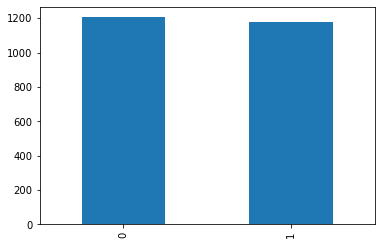

In [3]:
#EDA - 'Polarity' value count
df_train_distinct ['Polarity'].value_counts().plot.bar()

In [4]:
#drop 'Polarity' column to split x and y train datasets
train_y = df_train_distinct['Polarity']
train_x = df_train_distinct['Sentence']

In [5]:
#splitting test data set
test_y = df_test['Polarity']
test_x = df_test.drop('Polarity', axis=1)

In [6]:
#Removal of characters, numbers and punctuation from text:
train_x = train_x.replace('\d+', '', regex=True)
train_x = train_x.str.replace('[^\w\s]','')

C:\Users\khadi\AppData\Local\Temp\ipykernel_103796\3044236741.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_x = train_x.str.replace('[^\w\s]','')


In [7]:
#create a list of text data from dataframe
text = list(train_x)
type(text), len(text)

(list, 2381)

In [8]:
#Text Preprocessing Pipeline
import re
from nltk.corpus import stopwords
from spellchecker import SpellChecker
spell = SpellChecker()
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = []
    r = re.sub('[^\w\s]','', text[i])
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = re.sub('[0-9\n]', ' ', text[i])
    r = re.sub('[\d+]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [stemmer.stem(word) for word in r]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [9]:
for i in corpus[:10]:
    print(i)
    print('--------')

wow love place
--------
crust good
--------
tasti textur nasti
--------
stop late may bank holiday rick steve recommend love
--------
select menu great price
--------
get angri want damn pho
--------
honeslti didnt tast fresh
--------
potato like rubber could tell made ahead time kept warmer
--------
fri great
--------
great touch
--------


In [10]:
train_x = pd.DataFrame(corpus)

In [11]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(analyzer = 'word',
    stop_words='english',
    lowercase =  True,
    ngram_range = (1, 1),
    max_features = 200)
train_x = vect.fit_transform(corpus)
train_x

<2381x200 sparse matrix of type '<class 'numpy.int64'>'
	with 5660 stored elements in Compressed Sparse Row format>

In [12]:
# Topic Modelling
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=80, random_state=123)

In [13]:
LDA.fit(train_x)

LatentDirichletAllocation(n_components=80, random_state=123)

In [14]:
pd.DataFrame(LDA.components_, columns = vect.get_feature_names_out())

,absolut,act,alway,amaz,anoth,anyon,ask,away,awesom,bad,...,watch,way,week,went,wonder,wont,work,worst,worth,year
0,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
1,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,5.284774,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
2,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
3,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,33.0125,0.0125,0.0125
4,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,21.0125,0.0125,0.0125,0.0125,0.0125
76,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
77,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125
78,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,...,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125


In [15]:
# see the most common words by topic
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 30 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names_out()[i] for i in topic.argsort()[:50]])
    print('\n')

THE TOP 30 WORDS FOR TOPIC #0
['absolut', 'pizza', 'place', 'play', 'plea', 'plug', 'poor', 'pretti', 'price', 'probabl', 'problem', 'product', 'purchas', 'qualiti', 'quit', 'real', 'realli', 'reason', 'receiv', 'recept', 'recommend', 'restaur', 'piec', 'return', 'pictur', 'perform', 'love', 'low', 'make', 'manag', 'mani', 'meal', 'menu', 'minut', 'money', 'motorola', 'movi', 'need', 'new', 'nice', 'night', 'noth', 'old', 'order', 'overal', 'peopl', 'perfect', 'phone', 'lot', 'review']


THE TOP 30 WORDS FOR TOPIC #1
['absolut', 'place', 'play', 'plea', 'plug', 'poor', 'pretti', 'price', 'probabl', 'problem', 'pizza', 'product', 'qualiti', 'quit', 'real', 'realli', 'reason', 'receiv', 'recept', 'recommend', 'restaur', 'purchas', 'piec', 'pictur', 'phone', 'love', 'low', 'make', 'manag', 'mani', 'meal', 'menu', 'minut', 'money', 'motorola', 'need', 'new', 'nice', 'night', 'noth', 'old', 'order', 'overal', 'peopl', 'perfect', 'perform', 'return', 'review', 'right', 'said']


THE TOP 30 W

['absolut', 'place', 'play', 'plea', 'plug', 'poor', 'pretti', 'price', 'probabl', 'problem', 'product', 'purchas', 'qualiti', 'quit', 'real', 'realli', 'reason', 'receiv', 'recept', 'recommend', 'restaur', 'return', 'pizza', 'review', 'piec', 'phone', 'low', 'make', 'manag', 'mani', 'meal', 'menu', 'minut', 'money', 'motorola', 'movi', 'need', 'new', 'nice', 'night', 'noth', 'old', 'order', 'overal', 'peopl', 'perfect', 'perform', 'pictur', 'love', 'right']


THE TOP 30 WORDS FOR TOPIC #35
['absolut', 'piec', 'pizza', 'place', 'play', 'plug', 'poor', 'pretti', 'price', 'probabl', 'pictur', 'problem', 'purchas', 'qualiti', 'quit', 'real', 'realli', 'reason', 'receiv', 'recept', 'recommend', 'product', 'phone', 'perform', 'perfect', 'lot', 'love', 'low', 'make', 'manag', 'mani', 'meal', 'menu', 'minut', 'money', 'motorola', 'movi', 'need', 'new', 'nice', 'night', 'noth', 'old', 'order', 'overal', 'peopl', 'restaur', 'return', 'review', 'right']


THE TOP 30 WORDS FOR TOPIC #36
['absolut

['absolut', 'piec', 'pizza', 'place', 'play', 'plea', 'plug', 'poor', 'pretti', 'price', 'pictur', 'problem', 'purchas', 'qualiti', 'quit', 'real', 'realli', 'reason', 'receiv', 'recept', 'recommend', 'product', 'phone', 'perform', 'perfect', 'lot', 'love', 'low', 'make', 'manag', 'mani', 'meal', 'menu', 'minut', 'money', 'motorola', 'movi', 'need', 'new', 'nice', 'night', 'noth', 'old', 'order', 'overal', 'peopl', 'restaur', 'review', 'right', 'said']


THE TOP 30 WORDS FOR TOPIC #76
['absolut', 'pizza', 'place', 'play', 'plea', 'plug', 'poor', 'pretti', 'price', 'probabl', 'piec', 'problem', 'purchas', 'qualiti', 'quit', 'real', 'realli', 'reason', 'receiv', 'recept', 'recommend', 'product', 'pictur', 'phone', 'perform', 'lot', 'love', 'low', 'make', 'manag', 'mani', 'meal', 'menu', 'money', 'motorola', 'movi', 'need', 'new', 'nice', 'night', 'noth', 'old', 'order', 'overal', 'peopl', 'perfect', 'restaur', 'return', 'review', 'right']


THE TOP 30 WORDS FOR TOPIC #77
['absolut', 'pla

In [16]:
# applying the model to dataset
topic_results = LDA.transform(train_x)
train_x_topic = pd.DataFrame(topic_results)
train_x_topic.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,...,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
1,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,...,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250,0.006250
2,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,...,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500
3,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,...,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167,0.004167
4,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.202500,0.002500,0.002500


In [17]:
train_x_topic['Topic'] = topic_results.argmax(axis=1)

<AxesSubplot:>

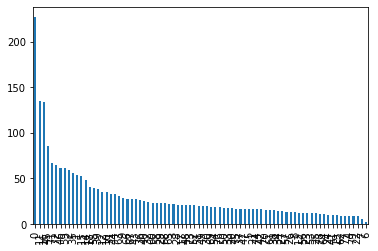

In [18]:
train_x_topic['Topic'].value_counts().plot.bar()

In [19]:
train_x_topic = train_x_topic.drop('Topic', axis=1)

In [20]:
#Scaling LDA features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x_topic)
StandardScaler()
print(scaler.transform(train_x_topic))

[[0.00415512 0.00415512 0.00466563 ... 0.00928793 0.00466563 0.00466563]
 [0.00692521 0.00692521 0.00777605 ... 0.01547988 0.00777605 0.00777605]
 [0.01523546 0.01523546 0.01710731 ... 0.03405573 0.01710731 0.01710731]
 ...
 [0.00692521 0.00692521 0.00777605 ... 0.01547988 0.00777605 0.00777605]
 [0.00277008 0.00277008 0.00311042 ... 0.00619195 0.00311042 0.00311042]
 [0.00193906 0.00193906 0.00217729 ... 0.00433437 0.00217729 0.00217729]]


In [21]:
#applying all transformations to test data set
test_x = test_x.replace('\d+', '', regex=True)
test_x = test_x.replace('[^\w\s]','')
text_test = list(test_x['Sentence'])
type(text_test), len(text_test)

corpus_test = []

for i in range(len(text_test)):
    r = re.sub('[^\w\s]','', text_test[i])
    r = re.sub('[^a-zA-Z]', ' ', text_test[i])
    r = re.sub('[0-9\n]', ' ', text_test[i])
    r = re.sub('[\d+]', ' ', text_test[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [stemmer.stem(word) for word in r]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus_test.append(r)

In [22]:
test_x = vect.fit_transform(corpus_test)
test_x

<600x200 sparse matrix of type '<class 'numpy.int64'>'
	with 1770 stored elements in Compressed Sparse Row format>

In [23]:
LDA.fit(test_x)
topic_results_test = LDA.transform(test_x)
test_x = pd.DataFrame(topic_results_test)
test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.002500,0.002500,0.002500,0.402500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.202500,0.002500,0.002500,0.002500
1,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,...,0.002083,0.362920,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083
2,0.003125,0.003125,0.003125,0.503125,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125,...,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125,0.003125
3,0.002500,0.002500,0.002500,0.295105,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.202500,0.002500,0.002500,0.002500,0.002500
4,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,...,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
print(rfc)
print(rfc.get_params())

RandomForestClassifier(random_state=1)
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [25]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_lr = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                        cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

#Training and Prediction
grid_lr.fit(train_x_topic, train_y)
print(grid_lr.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [26]:
#Random Forest
best_params = grid_lr.best_params_
rfc.set_params(**best_params)
rfc.fit(train_x_topic, train_y)
y_pred = rfc.predict(test_x)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(test_y, y_pred)

0.545

In [28]:
preproc = pd.DataFrame(train_x_topic)
preproc.to_csv(r'C:\Users\khadi\Desktop\MMA Program\MMA 865 Big Data\Individual Assignment\train_x_proc.csv', index=False)

predicted_y = pd.DataFrame(y_pred)
predicted_y.to_csv(r'C:\Users\khadi\Desktop\MMA Program\MMA 865 Big Data\Individual Assignment\predicted-y.csv', index=False)